In [13]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
%matplotlib inline

In [14]:
data=np.float64(np.load('MNIST.npy'))
labels=np.float32(np.load('MNIST_labels.npy'))
n=len(data)
p=len(data[0])
for i in range(0,n):
    data[i]=data[i]/255 # The value lie in [0,1]
print (data.shape)

(70000, 784)


In [15]:
# Get Mnist data and split into train validation and test
def get_mnist():

    data=np.float64(np.load('MNIST.npy'))
    labels=np.float32(np.load('MNIST_labels.npy'))
    #print(data.shape)
    
    data=np.float32(data)/255.
    
    train_dat=data[0:50000]
    train_labels=labels[0:50000]
    
    val_dat=data[50000:60000]
    val_labels=labels[50000:60000]
    
    test_dat=data[60000:70000]
    test_labels=labels[60000:70000]
    
    return (train_dat, train_labels), (val_dat, val_labels), (test_dat, test_labels)

In [16]:
(Train,TrainLabel),(Val,ValLabel),(Test,TestLabel)=get_mnist()

## Random Forest Classifier

In [19]:
def RandomForestWithN(nTrees,t=False):
    clf=RandomForestClassifier(n_estimators=nTrees,min_samples_split=2,max_features=100,criterion="entropy")
    start_time = time.time()
    clf.fit(Train,TrainLabel)
    end_time = time.time()
    tt=end_time-start_time
    if(t==False):
        temp=clf.predict(Train)
        Error1=sum(temp!=TrainLabel)/len(temp)

        temp=clf.predict(Val)
        Error2=sum(temp!=ValLabel)/len(temp)

        return(Error1,Error2,tt)
    else:
        temp=clf.predict(Test)
        Error=sum(temp!=TestLabel)/len(temp)
        return(Error)        

In [20]:
ErrorTrain=[]
ErrorVal=[]
MaxTree=20
NumTrees=list(range(1,MaxTree+1))
for i in NumTrees:
    e1,e2,t=RandomForestWithN(i)
    ErrorTrain.append(e1)
    ErrorVal.append(e2)

In [22]:
print(ErrorTrain)
print(ErrorVal)
MinimumErrorTree=np.array(ErrorVal).argmin()+1
print("The number of trees with minimum validation error is ",MinimumErrorTree)

[0.05644, 0.05588, 0.01776, 0.01026, 0.00612, 0.00392, 0.00238, 0.00194, 0.00128, 0.00078, 0.00054, 0.00046, 0.00058, 0.0004, 0.00022, 0.0004, 0.00028, 0.00022, 0.00014, 0.00018]
[0.1493, 0.1527, 0.0969, 0.0798, 0.0708, 0.0622, 0.0587, 0.0528, 0.0512, 0.0483, 0.0466, 0.047, 0.0448, 0.0429, 0.0427, 0.0431, 0.0418, 0.0411, 0.0388, 0.0418]
The number of trees with minimum validation error is  19


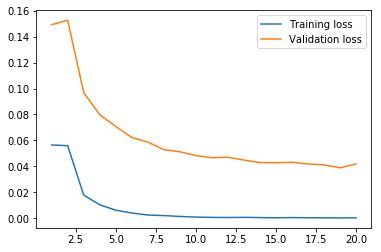

In [23]:
plt.plot(NumTrees,ErrorTrain)
plt.plot(NumTrees,ErrorVal)
plt.legend(['Training loss','Validation loss'], loc='upper right')

For the number of trees between 1 and 20, the validation error rate is minimum when the number is 19.

Thus, I will use the number of trees as 19 for the following problems

In [25]:
e1,e2,t=RandomForestWithN(MinimumErrorTree)
print("The training time is about",round(t,4))
e3=RandomForestWithN(MinimumErrorTree,t=True)
print("The training   error rate is ",round(e1,4))
print("The validation error rate is ",round(e2,4))
print("The test       error rate is ",round(e3,4))

The training time is about 18.1526
The training   error rate is  0.0001
The validation error rate is  0.039
The test       error rate is  0.035
